<a href="https://colab.research.google.com/github/aparnasankar2004-cmyk/Film-Pulse-AI-Movie-Review-Sentiment-Prediction-Web-App/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FilmPulse AI: Movie Review Sentiment Prediction Web App**
FilmPulse AI is an interactive Streamlit web application that predicts whether a movie review is Positive or Negative using advanced Machine Learning models.
The app is trained on the IMDB Movie Reviews Dataset, using TF-IDF vectorization combined with Multinomial Naive Bayes and Linear SVM classifiers.

This project demonstrates end-to-end development—from data processing to model training to web deployment using Streamlit and Ngrok in Google Colab.

**Machine Learning Workflow**



1.   Text Preprocessing
2.   Feature Extraction


1.   Models Used

   | Model                       | Description                                |
| --------------------------- | ------------------------------------------ |
| **Multinomial Naive Bayes** | Fast baseline text classifier              |
| **Linear SVM (LinearSVC)**  | High-accuracy linear model for sparse data |







In [2]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

df["clean_review"] = df["review"].apply(clean_text)
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,im going to have to disagree with the previous...


In [6]:
X = df["clean_review"]
X



,clean_review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...
...,...
49995,i thought this movie did a down right good job...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,i am a catholic taught in parochial elementary...
49998,im going to have to disagree with the previous...


In [7]:
y = df["sentiment"]
y

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
...,...
49995,positive
49996,negative
49997,negative
49998,negative


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Model 1: Multinomial Naive Bayes
The Multinomial Naive Bayes classifier was chosen as the initial baseline model due to its known efficiency and strong performance on text classification tasks using count-based features like TF-IDF.

The model was trained on the transformed data and evaluated on the test set.

  | Model                       | Result                                |
| --------------------------- | ------------------------------------------ |
| **Overall Accuracy** |  0.85              |
| **F1-Score (negative)**  | 0.85|
| **Prediction Speed** | fast              |



In [10]:
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
tfidf

TfidfVectorizer(max_features=5000, stop_words='english')

In [11]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

nb_pred = nb.predict(X_test_tfidf)

print("\n🔹 Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))



🔹 Naive Bayes Accuracy: 0.8516
              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5000
    positive       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



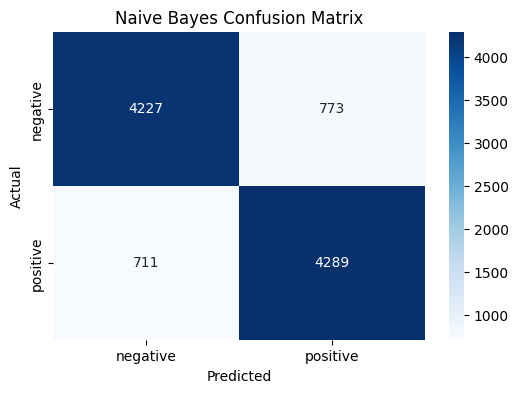

In [18]:
plot_confusion(y_test, nb_pred, "Naive Bayes")

#MODEL 2: Support Vector Classifier (SVC)
The SVC model, a high-performing classifier that finds the optimal separating hyperplane between classes, was implemented to compare against the baseline Naive Bayes.

  | Model                       | Result                                |
| --------------------------- | ------------------------------------------ |
| **Overall Accuracy** |  0.88             |
| **F1-Score (negative)**  | 0.88|
| **Prediction Speed** | slower              |




In [12]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

svm_pred = svm.predict(X_test_tfidf)

print("\n🔹 Linear SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


🔹 Linear SVM Accuracy: 0.8761
              precision    recall  f1-score   support

    negative       0.88      0.87      0.88      5000
    positive       0.87      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [13]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "positive"], yticklabels=["negative", "positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

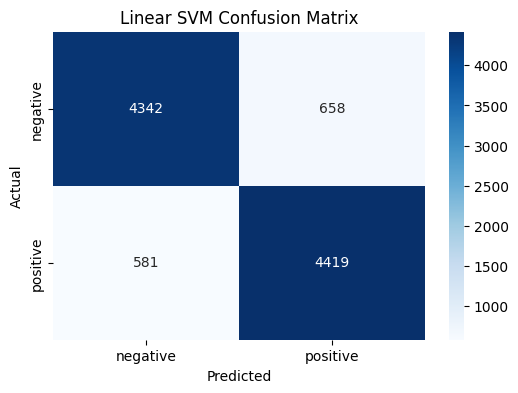

In [17]:
plot_confusion(y_test, svm_pred, "Linear SVM")


/tmp/ipython-input-3668871398.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


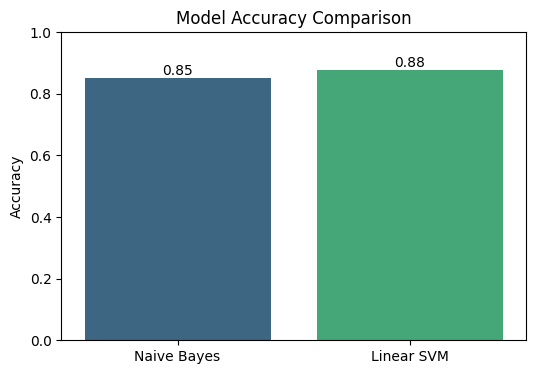

In [16]:
models = ["Naive Bayes", "Linear SVM"]
accuracies = [accuracy_score(y_test, nb_pred), accuracy_score(y_test, svm_pred)]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")
plt.show()

In [19]:
def predict_review(text):
    cleaned = clean_text(text)
    vec = tfidf.transform([cleaned])
    svm_result = svm.predict(vec)[0]
    nb_result = nb.predict(vec)[0]

    return {
        "SVM Prediction": svm_result,
        "Naive Bayes Prediction": nb_result
    }

# Example
print("\nTest Prediction:")
print(predict_review("The movie was amazing and full of emotions!"))


Test Prediction:
{'SVM Prediction': 'positive', 'Naive Bayes Prediction': np.str_('positive')}


##  **Conclusion**

FilmPulse AI demonstrates how **Natural Language Processing (NLP)** and **Machine Learning (ML)** can be combined to create a practical tool for sentiment analysis. By leveraging TF-IDF features and models like **Multinomial Naive Bayes** and **Linear SVM**, the app can accurately classify movie reviews as positive or negative.  

The project not only highlights the power of ML in understanding textual data but also provides an **interactive platform** for users to explore movie review sentiments in real time. This approach can be extended to other domains, such as product reviews, social media posts, or customer feedback, making it a versatile and impactful application of AI.



# **STREAMLIT CODE**

In [12]:
!ls "/content/drive/MyDrive/machine learning_project/app.py"

'/content/drive/MyDrive/machine learning_project/app.py'


In [20]:
!cat "/content/drive/MyDrive/machine learning_project/app.py"

cat: '/content/drive/MyDrive/machine learning_project/app.py': No such file or directory
